<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Importing the Necessary Libraries<br></p>

In [38]:
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Creating a Pandas DataFrame from a CSV file<br></p>


In [39]:
data = pd.read_csv('/home/ahsan/Downloads/all/train.csv')

In [40]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [41]:
data.shape

(891, 12)

In [42]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [43]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [44]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [45]:
data["Embarked"] = data["Embarked"].fillna("S")

In [46]:
data["Age"] = data["Age"].fillna(29)

In [47]:
del data['Cabin']

In [48]:
data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Embarked       False
dtype: bool

In [7]:
Age = data.pop('Age')

In [8]:
Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [9]:
Age=Age.dropna()

In [10]:
Age

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
18     31.0
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
27     19.0
30     40.0
33     66.0
34     28.0
35     42.0
37     21.0
38     18.0
       ... 
856    45.0
857    51.0
858    24.0
860    41.0
861    21.0
862    48.0
864    24.0
865    42.0
866    27.0
867    31.0
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
889    26.0
890    32.0
Name: Age, Length: 714, dtype: float64

In [11]:
Cabin = data.pop('Cabin')

In [16]:
Embarked= data.pop('Embarked')

In [12]:
Cabin

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [17]:
Embarked 

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [14]:
Cabin=Cabin.dropna()

In [18]:
Embarked=Embarked.dropna() 

In [19]:
Embarked

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 889, dtype: object

In [15]:
Cabin

1              C85
3             C123
6              E46
10              G6
11            C103
21             D56
23              A6
27     C23 C25 C27
31             B78
52             D33
54             B30
55             C52
61             B28
62             C83
66             F33
75           F G73
88     C23 C25 C27
92             E31
96              A5
97         D10 D12
102            D26
110           C110
118        B58 B60
123           E101
124            D26
128          F E69
136            D47
137           C123
139            B86
148             F2
          ...     
751           E121
759            B77
763        B96 B98
765            D11
772            E77
776            F38
779             B3
781            B20
782             D6
789        B82 B84
796            D17
802        B96 B98
806            A36
809             E8
815           B102
820            B69
823           E121
829            B28
835            E49
839            C47
849            C92
853         

                 PassengerId
Survived Sex                
0        female           81
         male            468
1        female          233
         male            109


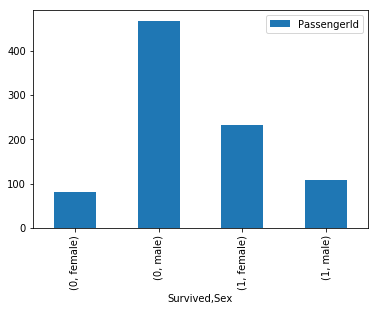

In [8]:
SexData= data[['PassengerId', 'Survived','Sex']].groupby(['Survived','Sex']).count()
print(SexData)
SexData.plot(kind='bar');

                 PassengerId
Survived Pclass             
0        1                80
         2                97
         3               372
1        1               136
         2                87
         3               119


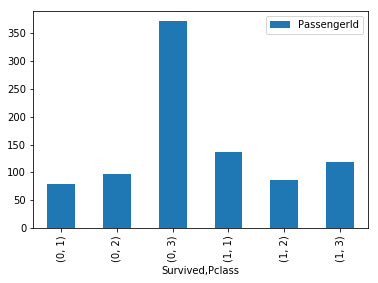

In [9]:
PclassData= data[['PassengerId', 'Survived','Pclass']].groupby(['Survived','Pclass']).count()
print(PclassData)
PclassData.plot(kind='bar');

   Survived Embarked  PassengerId
0         0        C           75
1         0        Q           47
2         0        S          427
3         1        C           93
4         1        Q           30
5         1        S          217
0    C
1    Q
2    S
3    C
4    Q
5    S
Name: Embarked, dtype: object


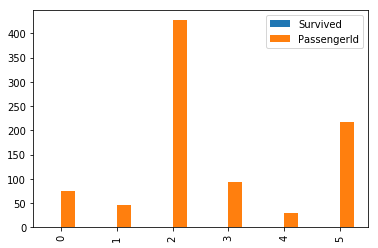

In [13]:
EmbarkedData= data[['PassengerId', 'Survived','Embarked']].groupby(['Survived','Embarked']).count().reset_index()
print(EmbarkedData)
EmbarkedData.plot(kind='bar');
A=EmbarkedData.PassengerId
print(A)

In [21]:
if EmbarkedData['Survived'].value == 0:
    labels = EmbarkedData.Embarked
    sizes = EmbarkedData.PassengerId
    colors = ['yellowgreen', 'gold', 'lightskyblue']
    patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=90)
    plt.legend(patches, labels, loc="best")
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

AttributeError: 'Series' object has no attribute 'value'

In [16]:
for x in EmbarkedData.Survived:
    print(x)

0
0
0
1
1
1


In [48]:
EmbarkedData.columns

Index(['Survived', 'Embarked', 'PassengerId'], dtype='object')

In [50]:
for Embarked in EmbarkedData:
    print(Embarked)

Survived
Embarked
PassengerId


In [24]:
X = 25
Y = 75
Z = 100/(int(X)+int(Y))
print('Percent of X: '+str(X*Z)+'%')
print('Percent of Y: '+str(Y*Z)+'%')

Percent of X: 25.0%
Percent of Y: 75.0%


In [45]:
# only store numeric data in features
data = data._get_numeric_data()
data.head(1)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
1,2,1,1,38.0,1,0,71.2833


In [46]:
# we drop age for the sake of this example because it contains NaN in some examples
data.drop('Age', axis=1, inplace=True)

In [81]:
# limit to categorical data using df.select_dtypes()
data = data.select_dtypes(include=[object])

data.head(3)

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S


In [82]:
data.columns

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [83]:
data = data.dropna()

In [84]:
# TODO: create a LabelEncoder object and fit it to each feature in X


# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()


# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
data_2 = data.apply(le.fit_transform)
data_2.head()

,Name,Sex,Ticket,Cabin,Embarked
1,51,0,123,80,0
3,74,0,36,54,2
6,122,1,62,128,2
10,161,0,134,144,2
11,27,0,31,48,2


In [85]:
# TODO: create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(data_2)

# 3. Transform
onehotlabels = enc.transform(data_2).toarray()
onehotlabels.shape

# as you can see, you've the same number of rows 891
# but now you've so many more columns due to how we changed all the categorical data into numerical data

(202, 494)

In [86]:
onehotlabels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.]])

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Declare the Columns You Want to Use as Features
<br><br></p>

In [37]:
features = ['Pclass',  'Age', 'SibSp','Parch', 'Fare']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Specify the Prediction Target
<br><br></p>


In [38]:
target = ['Survived']

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Extract Features and Target ('Survived') Values into Separate Dataframes
<br><br></p>


In [39]:
X = data[features]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=324)

In [43]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
y = data[target]

In [41]:
X.iloc[2]

Pclass     1.0000
Age       54.0000
SibSp      0.0000
Parch      0.0000
Fare      51.8625
Name: 6, dtype: float64

In [44]:
y_prediction = regressor.predict(X_test)
y_prediction

array([[0.58713224],
       [0.80193333],
       [0.67481751],
       [0.70417096],
       [0.64508211],
       [0.74409551],
       [0.65152944],
       [0.77662282],
       [0.78540466],
       [0.64362515],
       [0.67928893],
       [0.86158665],
       [0.49395174],
       [0.79084794],
       [0.75356864],
       [0.63257032],
       [0.87109119],
       [0.88025699],
       [0.74579097],
       [0.78448294],
       [0.66016286],
       [0.68577886],
       [0.66254829],
       [0.6527175 ],
       [0.90833211],
       [0.67421197],
       [0.63540752],
       [0.54497246],
       [0.82562711],
       [0.8586219 ],
       [0.8249219 ],
       [0.75201873],
       [0.68023028],
       [0.58338941],
       [0.80280067],
       [0.76827109],
       [0.72464957],
       [0.71266121],
       [0.64395611],
       [0.6030396 ],
       [0.66004018],
       [0.58711223],
       [0.65190908],
       [0.81028861],
       [0.7297016 ],
       [0.73911831],
       [0.6063163 ],
       [0.702

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Fit on Train Set
<br><br></p>


In [ ]:
Survived_classifier = DecisionTreeClassifier(max_leaf_nodes=10, random_state=0)
Survived_classifier.fit(X_train, y_train)

In [ ]:
type(humidity_classifier)

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Predict on Test Set 

<br><br></p>

In [ ]:
predictions = humidity_classifier.predict(X_test)

In [ ]:
predictions[:10]

In [ ]:
y_test['high_humidity_label'][:10]

<p style="font-family: Arial; font-size:1.75em;color:purple; font-style:bold"><br>

Measure Accuracy of the Classifier
<br><br></p>


In [ ]:
accuracy_score(y_true = y_test, y_pred = predictions)